In [40]:
# Implementing libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
os.getcwd()

'/content/drive/My Drive/Netflix-Dataset'

In [42]:
os.chdir("/content/drive/MyDrive/Netflix-Dataset/")

In [43]:
dataset_path = os.getcwd()

In [44]:
dataset_path

'/content/drive/MyDrive/Netflix-Dataset'

In [45]:
# Read the dataset

df = pd.read_csv(os.path.join(dataset_path, "Input_Dataset.csv"), header = None, names = ['Cust_Id', 'Rating', 'Date'], usecols = [0,1])
df['Rating'] = df['Rating'].astype(float)

In [46]:
df

,Cust_Id,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0
...,...,...
24058258,2591364,2.0
24058259,1791000,2.0
24058260,512536,5.0
24058261,988963,3.0


In [47]:
# Rename dataset and get indexes

dataset = df
dataset.index = np.arange(0, len(dataset))

In [48]:
# Calculate user ratings grouped by movies

count_by_ratings = dataset.groupby('Rating')['Rating'].agg(['count'])
print("Count grouped by ratings: \n\n", count_by_ratings)

Count grouped by ratings: 

           count
Rating         
1.0     1118186
2.0     2439073
3.0     6904181
4.0     8085741
5.0     5506583


In [49]:
# Calculate movie count

movie_count = dataset.isnull().sum()[1]
print("Count of movies: {}".format(movie_count))

Count of movies: 4499


In [50]:
# Calculate unique customer count

customer_count = dataset['Cust_Id'].nunique() - movie_count
print("Count of unique customers: {}".format(customer_count))

Count of unique customers: 470758


In [51]:
# Get rating count (total records - movie count = ratings count)

rating_count = dataset['Cust_Id'].count() - movie_count
print("Count of user ratings: {}".format(rating_count))

Count of user ratings: 24053764


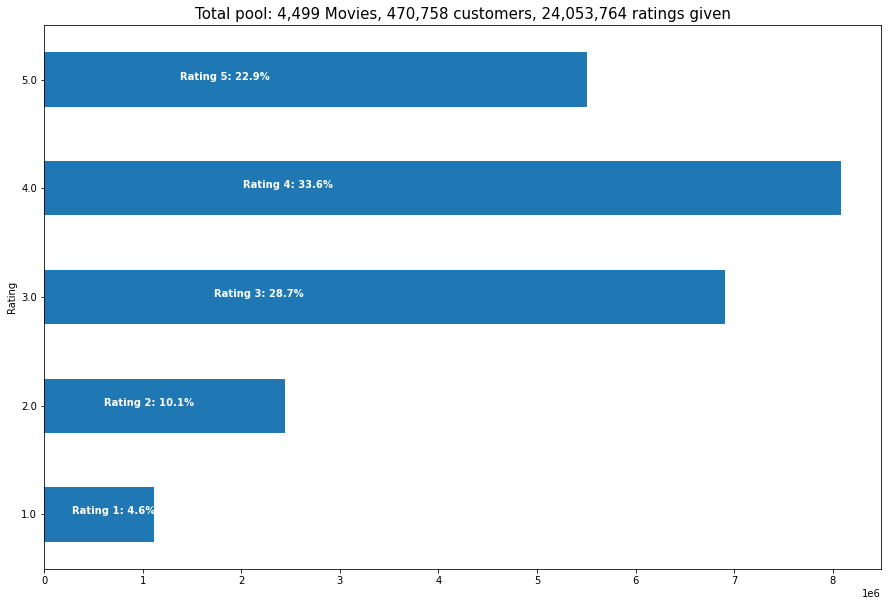

In [52]:
# Visualizing the composition of ratings based on groups

ax = count_by_ratings.plot(kind = 'barh', legend = False, figsize = (15,10))
plt.title('Total pool: {:,} Movies, {:,} customers, {:,} ratings given'.format(movie_count, customer_count, rating_count), fontsize=15)
plt.axis('on')

for i in range(1,6):
    ax.text(count_by_ratings.iloc[i-1][0]/4, i-1, 'Rating {}: {:.1f}%'.format(i, count_by_ratings.iloc[i-1][0]*100 / count_by_ratings.sum()[0]), 
            color = 'white', weight = 'bold')

In [53]:
# Subset of original dataset with null ratings 

dataset_nan = pd.DataFrame(pd.isnull(dataset.Rating))
dataset_nan = dataset_nan[dataset_nan['Rating'] == True]
dataset_nan = dataset_nan.reset_index()

In [54]:
len(dataset_nan)

4499

In [55]:
dataset_nan

,index,Rating
0,0,True
1,548,True
2,694,True
3,2707,True
4,2850,True
...,...,...
4494,24046714,True
4495,24047329,True
4496,24056849,True
4497,24057564,True


In [56]:
movie_np = []
movie_id = 1

In [57]:
for i,j in zip(dataset_nan['index'][1:],dataset_nan['index'][:-1]):
    # numpy approach
    temp = np.full((1,i-j-1), movie_id)
    movie_np = np.append(movie_np, temp)
    movie_id += 1

In [58]:
# Account for last record and corresponding length
# numpy approach

last_record = np.full((1,len(dataset) - dataset_nan.iloc[-1, 0] - 1),movie_id)
movie_np = np.append(movie_np, last_record)

In [59]:
print('Movie numpy array: {}'.format(movie_np))
print('Length of array: {}'.format(len(movie_np)))

# remove those Movie ID rows
dataset = dataset[pd.notnull(dataset['Rating'])]

Movie numpy array: [1.000e+00 1.000e+00 1.000e+00 ... 4.499e+03 4.499e+03 4.499e+03]
Length of array: 24053764


In [60]:
dataset['Movie_Id'] = movie_np.astype(int)
dataset['Cust_Id'] = dataset['Cust_Id'].astype(int)
print('-----Dataset Examples-----')
print(dataset.iloc[::5000000, :])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


-----Dataset Examples-----
          Cust_Id  Rating  Movie_Id
1         1488844     3.0         1
5000996    501954     2.0       996
10001962   404654     5.0      1962
15002876   886608     2.0      2876
20003825  1193835     2.0      3825


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [61]:
metrics = ['count','mean']